In [6]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor as KNN
%matplotlib inline

import pandas as pd
# import numpy as np
import os, random
import sklearn

In [7]:
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

def RemoveRowWithNAN(data):
    data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    return data.reset_index()

def RemoveColumnsWithNull(data, num):
    complete_cols = [column for column in data.columns if len(data[column][data[column].isnull()]) < num]
    return data[complete_cols]

def ReomveRowwithNANWithNum(data):
    data = data.dropna(thresh=None)
    return data

def GetNumpyColumnFromIndex(theDF):
    theD = pd.DataFrame(theDF.values);
    return theD.as_matrix()

def CheckPandasNAN(data):
    theResult = pd.isnull(data)
    count = 0;
    for i in theResult:
        if(i == True): count+=1
    return "the number of NAN is :" , count

In [8]:
df =GetPandasFromFileCSV("result_ep.csv")

df.head()


,Unnamed: 0,New_TMY3,New_RNNs,Post_TMY3,Post_RNNs,Pre_TMY3,Pre_RNNs,Unnamed: 7,New_TMY3.1,New_RNNs.1,Post_TMY3.1,Post_RNNs.1,Pre_TMY3.1,Pre_RNNs.1
0,Jan,1.893836,94.170343,2.245674,112.626714,0.047506,148.093534,NaN,533944.41400,420326.0082,617203.83540,489194.3490,640970.82540,504689.85290
1,Feb,0.038964,3.014243,0.056591,3.520774,0.072178,21.114042,NaN,390636.20460,346056.1418,447642.45320,401305.8252,459411.43760,411484.51680
2,Mar,2061.596261,668.802558,2339.644622,785.429508,2126.164874,1060.282039,NaN,288969.94950,314982.1789,330562.84170,360279.5460,333416.01090,372118.57580
3,Apr,5838.669429,7544.875814,6488.224380,8656.153515,6225.315898,7232.065940,NaN,146360.39070,103851.8232,165165.45860,118705.1333,162761.65660,118710.21620
4,May,15485.521090,10733.114810,17038.022570,12322.803970,15397.166830,10339.756290,NaN,57938.14187,60905.4669,66027.78931,69689.7598,65822.53932,69836.71594


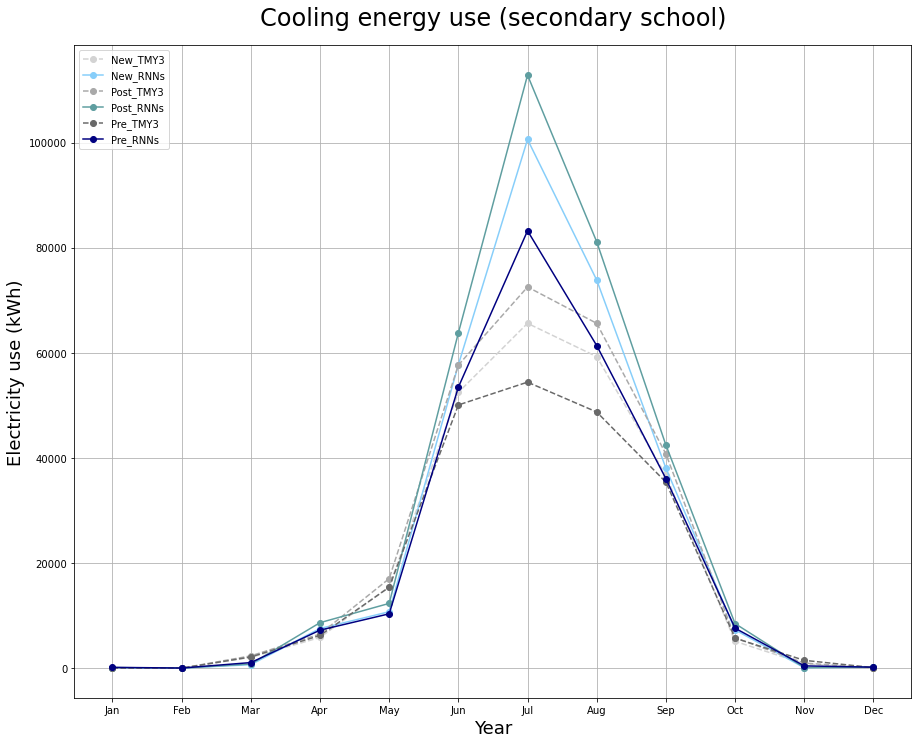

In [9]:
plt.figure(figsize=(15,12))
plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightskyblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3'],'--', color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='cadetblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], '--', color='dimgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='navy', marker='o')


plt.title('Cooling energy use (secondary school)', fontsize=24,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper left')
plt.grid(True)
plt.show()

In [10]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import seaborn as sns
import math
sns.set_style("whitegrid")
sns.set_context("poster")


# plt.figure(figsize=(25,12))
# plt.plot(df['Unnamed: 0'], df['New_TMY3'], color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightpink', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'], color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='salmon', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='firebrick', marker='o')


# plt.title('Cooling energy use (secondary school)', fontsize=28,  pad=20)
# plt.xlabel('Year', fontsize=24)
# plt.ylabel('Electricity use (kWh)', fontsize=24)
# plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper left')
# plt.grid(True)
# plt.show()

ModuleNotFoundError: No module named 'seaborn'

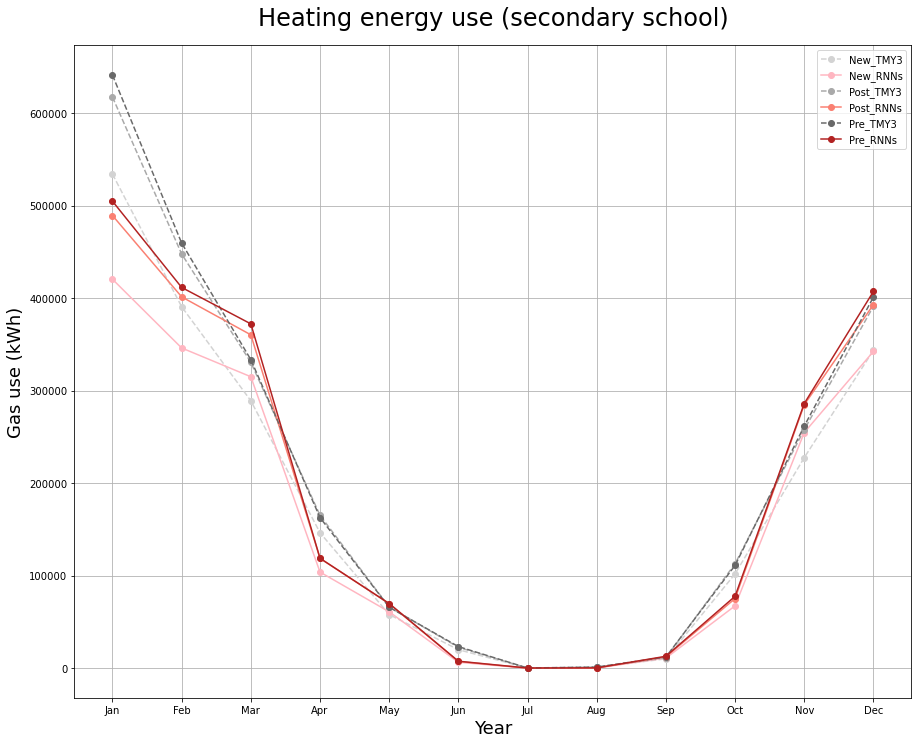

In [11]:
plt.figure(figsize=(15,12))
plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], '--',color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='lightpink', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'], '--',color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='salmon', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'], '--', color='dimgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='firebrick', marker='o')


plt.title('Heating energy use (secondary school)', fontsize=24,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Gas use (kWh)', fontsize=18)
plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper right')
plt.grid(True)
plt.show()

In [12]:
df =GetPandasFromFileCSV("result_ep_smalloffice_final_0803.csv")

df.head()


,Unnamed: 0,New_TMY3,New_NREL,New_Real,New_RNNs,Post_TMY3,Post_NREL,Post_Real,Post_RNNs,Pre_TMY3,...,New_Real.1,New_RNNs.1,Post_TMY3.1,Post_NREL.1,Post_Real.1,Post_RNNs.1,Pre_TMY3.1,Pre_NREL.1,Pre_Real.1,Pre_RNNs.1
0,Jan,0.056873,0.110011,0.180504,0.180504,0.077880,0.163607,0.318496,0.318496,0.351031,...,4062.461431,4062.461431,6987.508880,4652.609269,5725.933601,5725.933601,13810.090520,9925.101084,11912.036170,11912.036170
1,Feb,0.092432,0.295814,0.671955,0.671955,0.153938,0.824909,1.211507,1.211507,2.137729,...,2906.614573,2906.614573,4460.162158,3877.345046,4194.779788,4194.779788,9310.652856,8501.959932,8988.376725,8988.376725
2,Mar,18.865393,0.277148,6.336005,6.336005,38.835402,1.090240,17.985232,17.985232,63.150886,...,2238.957575,2238.957575,2766.798643,4328.793876,2936.251375,2936.251375,6430.356708,9408.415912,6626.100296,6626.100296
3,Apr,51.034123,23.113613,51.185619,51.185619,93.459436,57.485549,111.897386,111.897386,147.090976,...,448.651444,448.651444,916.167288,1102.450251,633.286699,633.286699,2447.565598,2816.938875,1882.687180,1882.687180
4,May,171.704434,101.506289,161.387143,161.387143,308.809610,197.668108,300.605811,300.605811,427.017072,...,79.997244,79.997244,146.932830,232.786833,151.216233,151.216233,466.102047,790.555937,540.822364,540.822364


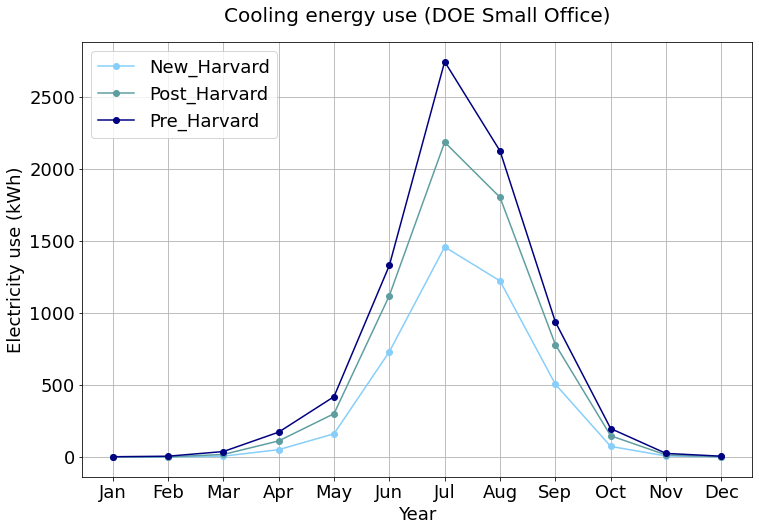

In [13]:
plt.figure(figsize=(12,8))

plt.plot(df['Unnamed: 0'], df['New_Real'], color='lightskyblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_Real'], color='cadetblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='navy', marker='o')


plt.title('Cooling energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
plt.legend(['New_Harvard', 'Post_Harvard','Pre_Harvard'], loc='upper left', fontsize=18)
plt.grid(True)
plt.show()

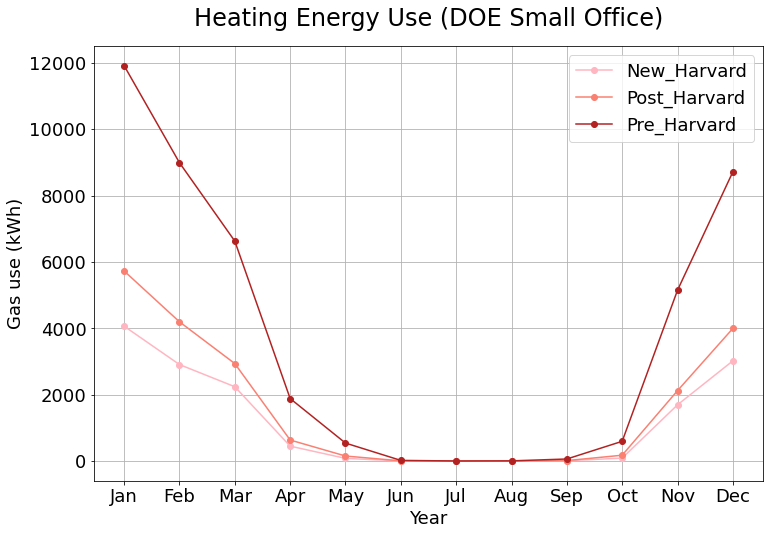

In [14]:
plt.figure(figsize=(12,8))

plt.plot(df['Unnamed: 0'], df['New_Real.1'], color='lightpink', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_Real.1'], color='salmon', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real.1'], color='firebrick', marker='o')


plt.title('Heating Energy Use (DOE Small Office)', fontsize=24,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Gas use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
plt.legend(['New_Harvard', 'Post_Harvard','Pre_Harvard'], loc='upper right', fontsize=18)
plt.grid(True)
plt.show()

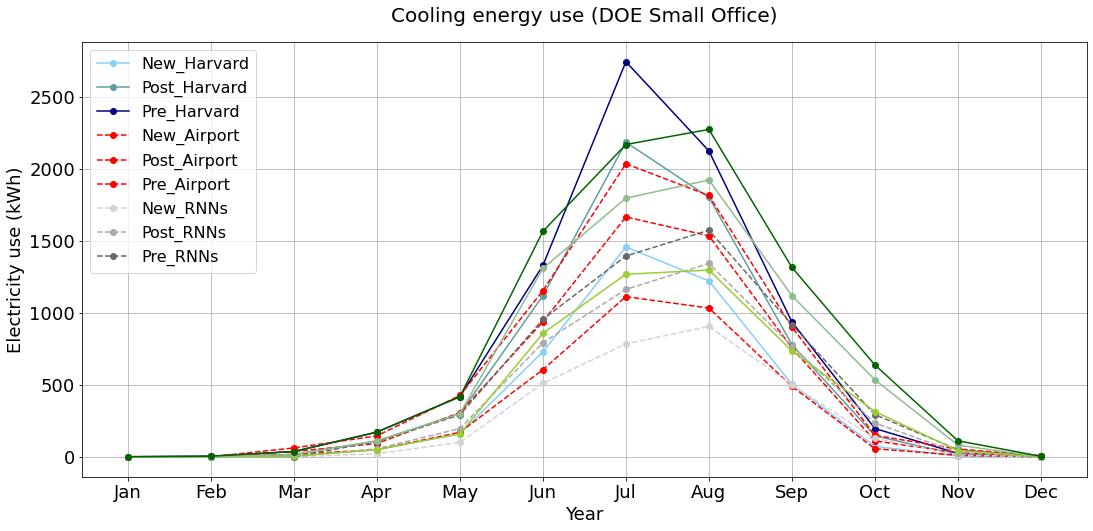

In [16]:
plt.figure(figsize=(18,8))

plt.plot(df['Unnamed: 0'], df['New_Real'], color='lightskyblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_Real'], color='cadetblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='navy', marker='o')

plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3'],'--',  color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3'],'--',  color='red', marker='o')

plt.plot(df['Unnamed: 0'], df['New_NREL'], '--', color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_NREL'],'--',  color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_NREL'],'--',  color='dimgrey', marker='o')

plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='yellowgreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='darkseagreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='darkgreen', marker='o')

plt.title('Cooling energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_TMY3','Post_TMY3','Pre_TMY3', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper left')
plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_Airport','Post_Airport','Pre_Airport', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper left')

plt.grid(True)
plt.show()

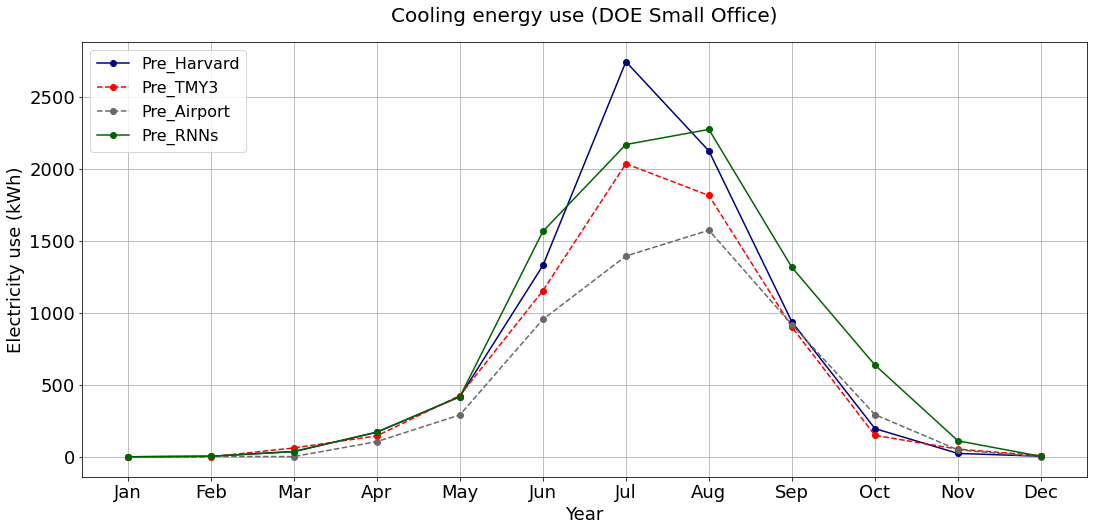

In [19]:
plt.figure(figsize=(18,8))

# plt.plot(df['Unnamed: 0'], df['New_Real'], color='lightskyblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_Real'], color='cadetblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='navy', marker='o')

# plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'],'--',  color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3'],'--',  color='red', marker='o')

# plt.plot(df['Unnamed: 0'], df['New_NREL'], '--', color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_NREL'],'--',  color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_NREL'],'--',  color='dimgrey', marker='o')

# plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='yellowgreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='darkseagreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='darkgreen', marker='o')

plt.title('Cooling energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_TMY3','Post_TMY3','Pre_TMY3', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper left')
plt.legend(['Pre_Harvard', 'Pre_TMY3','Pre_Airport', 'Pre_RNNs'], fontsize=16,loc='upper left')

plt.grid(True)
plt.show()

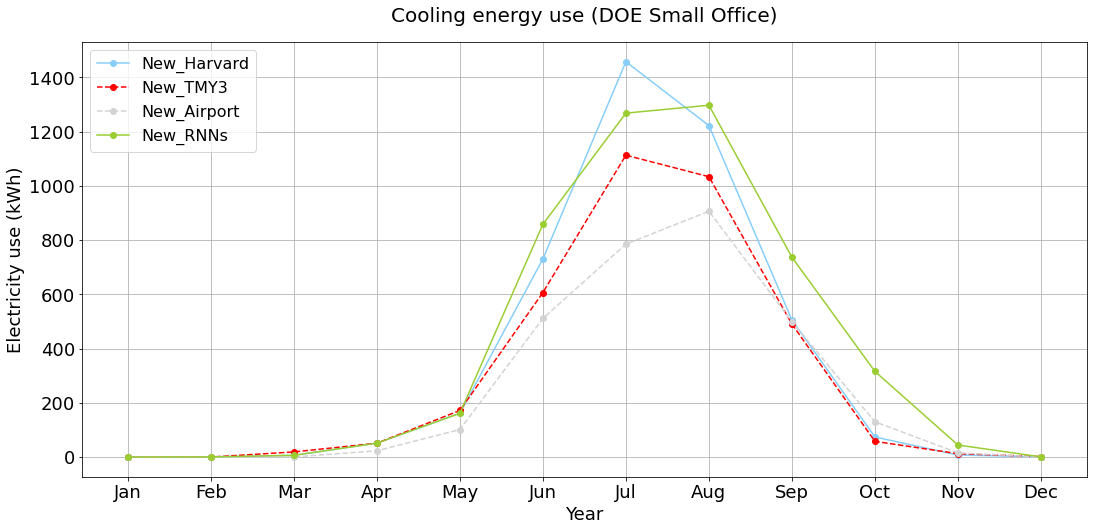

In [20]:
plt.figure(figsize=(18,8))

plt.plot(df['Unnamed: 0'], df['New_Real'], color='lightskyblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_Real'], color='cadetblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='navy', marker='o')

plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'],'--',  color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3'],'--',  color='red', marker='o')

plt.plot(df['Unnamed: 0'], df['New_NREL'], '--', color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_NREL'],'--',  color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_NREL'],'--',  color='dimgrey', marker='o')

plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='yellowgreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='darkseagreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='darkgreen', marker='o')

plt.title('Cooling energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_TMY3','Post_TMY3','Pre_TMY3', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper left')
plt.legend(['New_Harvard', 'New_TMY3','New_Airport', 'New_RNNs'], fontsize=16,loc='upper left')

plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(18,8))

plt.plot(df['Unnamed: 0'], df['New_Real'], color='lightskyblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_Real'], color='cadetblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='navy', marker='o')

plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'],'--',  color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3'],'--',  color='red', marker='o')

plt.plot(df['Unnamed: 0'], df['New_NREL'], '--', color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_NREL'],'--',  color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_NREL'],'--',  color='dimgrey', marker='o')

plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='yellowgreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='darkseagreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='darkgreen', marker='o')

plt.title('Cooling energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_TMY3','Post_TMY3','Pre_TMY3', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper left')
plt.legend(['New_Harvard', 'New_TMY3','New_Airport', 'New_RNNs'], fontsize=16,loc='upper left')

plt.grid(True)
plt.show()

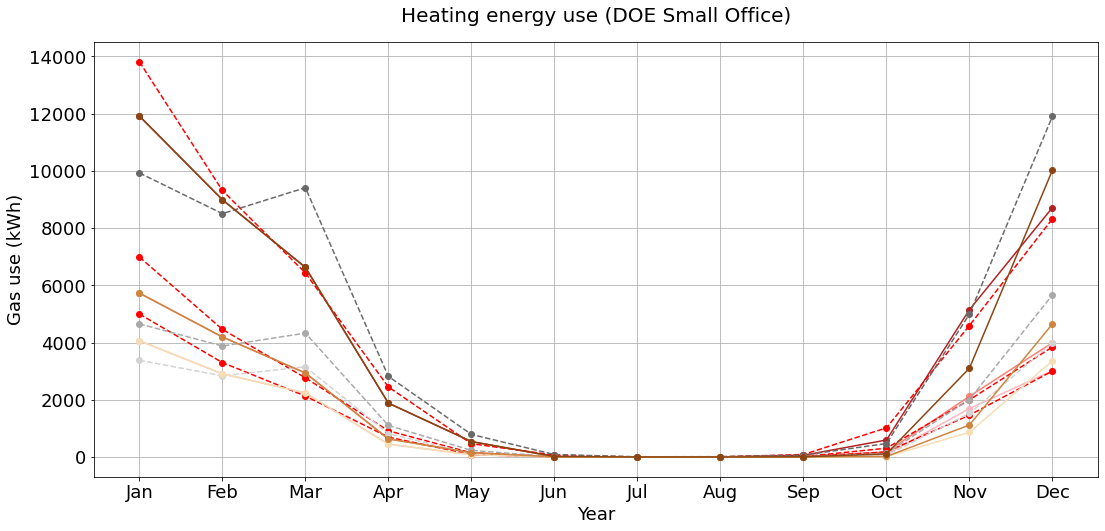

In [18]:
plt.figure(figsize=(18,8))

plt.plot(df['Unnamed: 0'], df['New_Real.1'], color='lightpink', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_Real.1'], color='salmon', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real.1'], color='firebrick', marker='o')

plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], '--', color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'],'--',  color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'],'--',  color='red', marker='o')

plt.plot(df['Unnamed: 0'], df['New_NREL.1'], '--', color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_NREL.1'],'--',  color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_NREL.1'],'--',  color='dimgrey', marker='o')

plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='wheat', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='peru', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='saddlebrown', marker='o')

plt.title('Heating energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Gas use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_TMY3','Post_TMY3','Pre_TMY3', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper middle')
# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_Airport','Post_Airport','Pre_Airport', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper middle')

plt.grid(True)
plt.show()

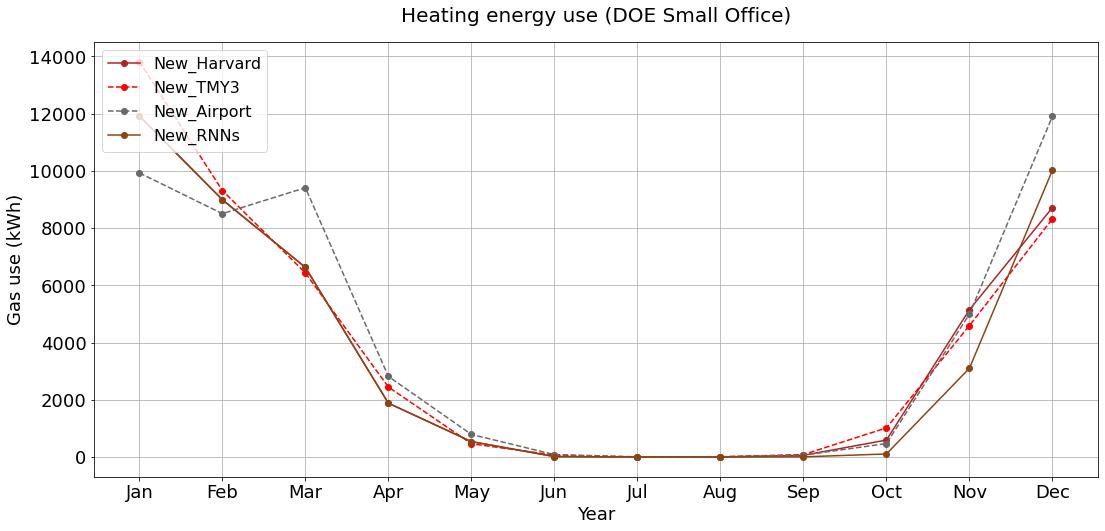

In [22]:
plt.figure(figsize=(18,8))

# plt.plot(df['Unnamed: 0'], df['New_Real.1'], color='lightpink', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_Real.1'], color='salmon', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real.1'], color='firebrick', marker='o')

# plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'],'--',  color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'],'--',  color='red', marker='o')

# plt.plot(df['Unnamed: 0'], df['New_NREL.1'], '--', color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_NREL.1'],'--',  color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_NREL.1'],'--',  color='dimgrey', marker='o')

# plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='wheat', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='peru', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='saddlebrown', marker='o')

plt.title('Heating energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Gas use (kWh)', fontsize=18)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)

plt.legend(['New_Harvard', 'New_TMY3','New_Airport', 'New_RNNs'], fontsize=16,loc='upper left')

# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_TMY3','Post_TMY3','Pre_TMY3', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper middle')
# plt.legend(['New_Harvard','Post_Harvard', 'Pre_Harvard', 'New_Airport','Post_Airport','Pre_Airport', 'New_RNNs','Post_RNNs', 'Pre_RNNs'], fontsize=16,loc='upper middle')

plt.grid(True)
plt.show()

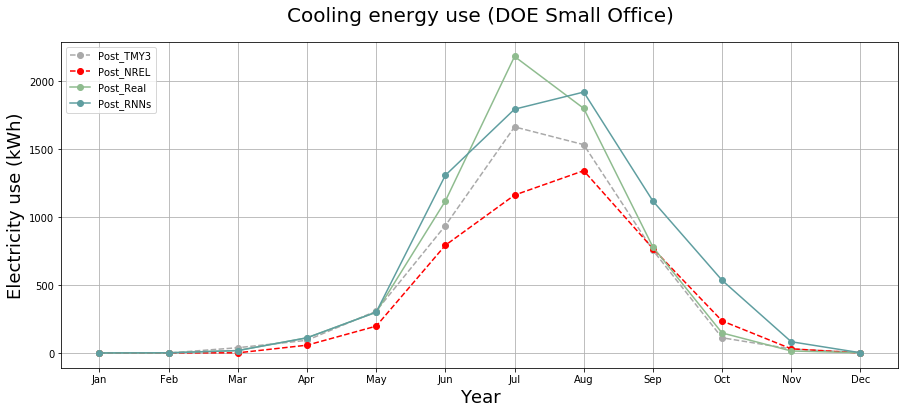

In [22]:
plt.figure(figsize=(15,6))
# plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_NREL'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_Real'], color='yellowgreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightskyblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3'], '--', color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_NREL'], '--', color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_Real'], color='darkseagreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='cadetblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], '--', color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_NREL'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='darkgreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='navy', marker='o')



plt.title('Cooling energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.legend(['Post_TMY3','Post_NREL','Post_Real','Post_RNNs', 'Pre_TMY3','Pre_Real', 'Pre_RNNs'], loc='upper left')
plt.grid(True)
plt.show()

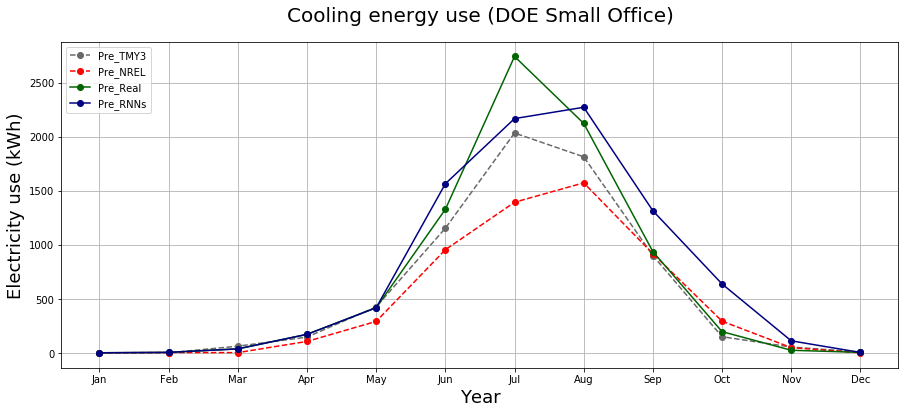

In [23]:
plt.figure(figsize=(15,6))
# plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_NREL'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_Real'], color='yellowgreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightskyblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'], '--', color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_NREL'], '--', color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_Real'], color='darkseagreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='cadetblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], '--', color='dimgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_NREL'], '--', color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='darkgreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='navy', marker='o')



plt.title('Cooling energy use (DOE Small Office)', fontsize=20,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Electricity use (kWh)', fontsize=18)
plt.legend([ 'Pre_TMY3','Pre_NREL','Pre_Real', 'Pre_RNNs'], loc='upper left')
plt.grid(True)
plt.show()

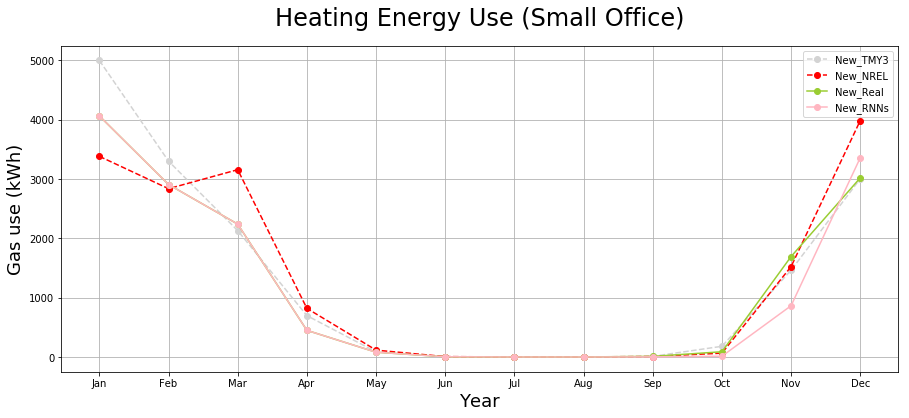

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], '--',color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['New_NREL.1'], '--',color='red', marker='o')
plt.plot(df['Unnamed: 0'], df['New_Real.1'], color='yellowgreen', marker='o')
plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='lightpink', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'], '--',color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_NREL.1'], '--',color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_Real.1'], color='darkseagreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='salmon', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'], '--',color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_NREL.1'], '--',color='red', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_Real.1'], color='darkgreen', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='firebrick', marker='o')



plt.title('Heating Energy Use (Small Office)', fontsize=24,  pad=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Gas use (kWh)', fontsize=18)
plt.legend(['New_TMY3',"New_NREL",'New_Real', 'New_RNNs', 'Post_TMY3','Post_Real','Post_RNNs', 'Pre_TMY3','Pre_Real', 'Pre_RNNs'], loc='upper right')
plt.grid(True)
plt.show()

### 

In [65]:
df =GetPandasFromFileCSV("result_ep_school.csv")

df.head()


,Unnamed: 0,New_TMY3,New_RNNs,Post_TMY3,Post_RNNs,Pre_TMY3,Pre_RNNs,Unnamed: 7,New_TMY3.1,New_RNNs.1,Post_TMY3.1,Post_RNNs.1,Pre_TMY3.1,Pre_RNNs.1
0,Jan,1.893836,94.170343,2.245674,112.626714,0.047506,148.093534,NaN,533944.41400,420326.0082,617203.83540,489194.3490,640970.82540,504689.85290
1,Feb,0.038964,3.014243,0.056591,3.520774,0.072178,21.114042,NaN,390636.20460,346056.1418,447642.45320,401305.8252,459411.43760,411484.51680
2,Mar,2061.596261,668.802558,2339.644622,785.429508,2126.164874,1060.282039,NaN,288969.94950,314982.1789,330562.84170,360279.5460,333416.01090,372118.57580
3,Apr,5838.669429,7544.875814,6488.224380,8656.153515,6225.315898,7232.065940,NaN,146360.39070,103851.8232,165165.45860,118705.1333,162761.65660,118710.21620
4,May,15485.521090,10733.114810,17038.022570,12322.803970,15397.166830,10339.756290,NaN,57938.14187,60905.4669,66027.78931,69689.7598,65822.53932,69836.71594


In [77]:
# plt.figure(figsize=(25,12))
# plt.plot(df['Unnamed: 0'], df['New_TMY3'], color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightskyblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'], color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='cadetblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='navy', marker='o')


# plt.title('Cooling energy use (small office)', fontsize=28,  pad=20)
# plt.xlabel('Year', fontsize=24)
# plt.ylabel('Electricity use (kWh)', fontsize=24)
# plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper left')
# plt.grid(True)
# plt.show()

In [78]:
# plt.figure(figsize=(25,12))
# plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='lightpink', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'], color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='salmon', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'], color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='firebrick', marker='o')


# plt.title('Heating energy use (small office)', fontsize=28,  pad=20)
# plt.xlabel('Year', fontsize=24)
# plt.ylabel('Gas use', fontsize=24)
# plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper right')
# plt.grid(True)
# plt.show()